In [ ]:
"""

This is a modification of a code that can be found here:
https://github.com/MichaelRyanGreer/Instructional/blob/main/inverse_kinematics/inverse_kinematics_DH_parameters.ipynb

This modfication was created in order to control a UR3/CB3 robot without using symbolic math from the original code.

Unfortunately the code sometimes creates 'risky' poses for the robot, so eventually it wasn't used in the final version of the project.

"""

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

DOF = 6


def get_DH_params(joints):
    return np.array([
        [15.19, joints[0], 0, np.pi / 2],
        [0, joints[1], -24.365, 0],
        [0, joints[2], -21.325, 0],
        [11.235, joints[3], 0, np.pi / 2],
        [8.535, joints[4], 0, -np.pi / 2],
        [15.53, joints[5], 0, -np.pi / 2]
    ], dtype=object)

def DH_trans_matrix(params):
    d, theta, a, alpha = (params[0], params[1], params[2], params[3])

    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    return np.array([
        [cos_theta, -sin_theta * cos_alpha, sin_theta * sin_alpha, a * cos_theta],
        [sin_theta, cos_theta * cos_alpha, -cos_theta * sin_alpha, a * sin_theta],
        [0, sin_alpha, cos_alpha, d],
        [0, 0, 0, 1]
    ])


def joint_transforms(joints):
    DH_params = get_DH_params(joints)
    transforms = [np.eye(4)]

    for el in DH_params:
        transforms.append(DH_trans_matrix(el))

    return transforms

def trans_EF_eval(joints):
    if isinstance(joints, np.ndarray):
        joints = joints.flatten().tolist()

    transforms = joint_transforms(joints)
    trans_EF = transforms[0]

    for mat in transforms[1:]:
        trans_EF = np.dot(trans_EF, mat)

    return trans_EF

def jacobian_numeric(q1, q2, q3, q4, q5, q6):
	return np.array([[15.5684*np.sin(q1)*np.sin(q5)*np.cos(q2 + q3 + q4) + 9.53289561392283e-16*np.sin(q1)*np.sin(q2 + q3 + q4)*np.cos(q5) - 8.529*np.sin(q1)*np.sin(q2 + q3 + q4) + 24.3428*np.sin(q1)*np.cos(q2) + 21.2924*np.sin(q1)*np.cos(q2 + q3) + 1.49056660511421e-15*np.sin(q2)*np.cos(q1) + 15.5684*np.cos(q1)*np.cos(q5) + 11.3183*np.cos(q1), -5.22250627496389e-16*np.sin(q1)*np.sin(q4)*np.cos(q2 + q3) + 9.53289561392283e-16*np.sin(q1)*np.sin(q5)*np.cos(q2 + q3 + q4) - 5.22250627496389e-16*np.sin(q1)*np.sin(q2 + q3)*np.cos(q4) + 5.83721505009822e-32*np.sin(q1)*np.sin(q2 + q3 + q4)*np.cos(q5) + 1.49056660511421e-15*np.sin(q1)*np.cos(q2) + 24.3428*np.sin(q2)*np.cos(q1) + 15.5684*np.sin(q5)*np.sin(q2 + q3 + q4)*np.cos(q1) + 21.2924*np.sin(q2 + q3)*np.cos(q1) - 6.51891737654128e-16*np.sin(-q1 + q2 + q3) + 6.51891737654128e-16*np.sin(q1 + q2 + q3) - 9.53289561392283e-16*np.cos(q1)*np.cos(q5)*np.cos(q2 + q3 + q4) + 8.529*np.cos(q1)*np.cos(q2 + q3 + q4) + 6.93045993339474e-16*np.cos(q1), -5.22250627496389e-16*np.sin(q1)*np.sin(q4)*np.cos(q2 + q3) + 9.53289561392283e-16*np.sin(q1)*np.sin(q5)*np.cos(q2 + q3 + q4) - 5.22250627496389e-16*np.sin(q1)*np.sin(q2 + q3)*np.cos(q4) + 5.83721505009822e-32*np.sin(q1)*np.sin(q2 + q3 + q4)*np.cos(q5) + 15.5684*np.sin(q5)*np.sin(q2 + q3 + q4)*np.cos(q1) + 21.2924*np.sin(q2 + q3)*np.cos(q1) - 6.51891737654128e-16*np.sin(-q1 + q2 + q3) + 6.51891737654128e-16*np.sin(q1 + q2 + q3) - 9.53289561392283e-16*np.cos(q1)*np.cos(q5)*np.cos(q2 + q3 + q4) + 8.529*np.cos(q1)*np.cos(q2 + q3 + q4) + 6.93045993339474e-16*np.cos(q1), -5.22250627496389e-16*np.sin(q1)*np.sin(q4)*np.cos(q2 + q3) + 9.53289561392283e-16*np.sin(q1)*np.sin(q5)*np.cos(q2 + q3 + q4) - 5.22250627496389e-16*np.sin(q1)*np.sin(q2 + q3)*np.cos(q4) + 5.83721505009822e-32*np.sin(q1)*np.sin(q2 + q3 + q4)*np.cos(q5) + 15.5684*np.sin(q5)*np.sin(q2 + q3 + q4)*np.cos(q1) - 9.53289561392283e-16*np.cos(q1)*np.cos(q5)*np.cos(q2 + q3 + q4) + 8.529*np.cos(q1)*np.cos(q2 + q3 + q4) + 6.93045993339474e-16*np.cos(q1), 5.83721505009822e-32*np.sin(q1)*np.sin(q5)*np.cos(q2 + q3 + q4) - 15.5684*np.sin(q1)*np.sin(q5) - 3.19786279658075e-32*np.sin(q1)*np.sin(q2 + q3 + q4) + 9.53289561392283e-16*np.sin(q1 + q5)*np.sin(q2 + q3 + q4) - 15.5684*np.cos(q1)*np.cos(q5)*np.cos(q2 + q3 + q4) + 5.22250627496389e-16*np.cos(q1)*np.cos(q2 + q3 + q4), 3.57426336351877e-48*np.sin(q1)*np.sin(q5)*np.cos(q2 + q3 + q4) + 8.23067278007968e-16*np.sin(q1)*np.sin(q5) - 5.03983353747691e-32*np.sin(q1)*np.sin(q2 + q3 + q4)*np.cos(q5) - 4.07824000642603e-64*np.sin(q1)*np.sin(q2 + q3 + q4) + 5.83721505009822e-32*np.sin(q5)*np.sin(q2 + q3 + q4)*np.cos(q1) + 8.23067278007968e-16*np.cos(q1)*np.cos(q5)*np.cos(q2 + q3 + q4) - 6.07716335728627e-64*np.cos(q1)*np.cos(q5) + 6.66027136847206e-48*np.cos(q1)*np.cos(q2 + q3 + q4)], [1.49056660511421e-15*np.sin(q1)*np.sin(q2) + 15.5684*np.sin(q1)*np.cos(q5) + 11.3183*np.sin(q1) - 15.5684*np.sin(q5)*np.cos(q1)*np.cos(q2 + q3 + q4) - 9.53289561392283e-16*np.sin(q2 + q3 + q4)*np.cos(q1)*np.cos(q5) + 8.529*np.sin(q2 + q3 + q4)*np.cos(q1) - 24.3428*np.cos(q1)*np.cos(q2) - 21.2924*np.cos(q1)*np.cos(q2 + q3), 24.3428*np.sin(q1)*np.sin(q2) + 15.5684*np.sin(q1)*np.sin(q5)*np.sin(q2 + q3 + q4) + 21.2924*np.sin(q1)*np.sin(q2 + q3) + 8.529*np.sin(q1)*np.cos(q2 + q3 + q4) + 6.93045993339474e-16*np.sin(q1) - 9.53289561392283e-16*np.sin(q1 + q5)*np.cos(q2 + q3 + q4) - 5.83721505009822e-32*np.sin(q2 + q3 + q4)*np.cos(q1)*np.cos(q5) + 5.22250627496389e-16*np.sin(q2 + q3 + q4)*np.cos(q1) - 1.49056660511421e-15*np.cos(q1)*np.cos(q2) - 1.30378347530825e-15*np.cos(q1)*np.cos(q2 + q3), 15.5684*np.sin(q1)*np.sin(q5)*np.sin(q2 + q3 + q4) + 21.2924*np.sin(q1)*np.sin(q2 + q3) + 8.529*np.sin(q1)*np.cos(q2 + q3 + q4) + 6.93045993339474e-16*np.sin(q1) - 9.53289561392283e-16*np.sin(q1 + q5)*np.cos(q2 + q3 + q4) - 5.83721505009821e-32*np.sin(q2 + q3 + q4)*np.cos(q1)*np.cos(q5) + 5.22250627496389e-16*np.sin(q2 + q3 + q4)*np.cos(q1) - 1.30378347530825e-15*np.cos(q1)*np.cos(q2 + q3), 15.5684*np.sin(q1)*np.sin(q5)*np.sin(q2 + q3 + q4) + 8.529*np.sin(q1)*np.cos(q2 + q3 + q4) + 6.93045993339474e-16*np.sin(q1) - 9.53289561392283e-16*np.sin(q1 + q5)*np.cos(q2 + q3 + q4) - 5.83721505009822e-32*np.sin(q2 + q3 + q4)*np.cos(q1)*np.cos(q5) + 5.22250627496389e-16*np.sin(q2 + q3 + q4)*np.cos(q1), -15.5684*np.sin(q1)*np.cos(q5)*np.cos(q2 + q3 + q4) + 5.22250627496389e-16*np.sin(q1)*np.cos(q2 + q3 + q4) - 5.83721505009822e-32*np.sin(q5)*np.cos(q1)*np.cos(q2 + q3 + q4) + 15.5684*np.sin(q5)*np.cos(q1) + 3.19786279658075e-32*np.sin(q2 + q3 + q4)*np.cos(q1) - 9.53289561392283e-16*np.sin(q2 + q3 + q4)*np.cos(q1 + q5), 5.83721505009822e-32*np.sin(q1)*np.sin(q5)*np.sin(q2 + q3 + q4) + 8.23067278007968e-16*np.sin(q1)*np.cos(q5)*np.cos(q2 + q3 + q4) - 6.07716335728627e-64*np.sin(q1)*np.cos(q5) + 6.66027136847206e-48*np.sin(q1)*np.cos(q2 + q3 + q4) - 3.57426336351877e-48*np.sin(q5)*np.cos(q1)*np.cos(q2 + q3 + q4) - 8.23067278007968e-16*np.sin(q5)*np.cos(q1) + 5.03983353747691e-32*np.sin(q2 + q3 + q4)*np.cos(q1)*np.cos(q5) + 4.07824000642603e-64*np.sin(q2 + q3 + q4)*np.cos(q1)], [0, -15.5684*np.sin(q5)*np.cos(q2 + q3 + q4) - 9.53289561392283e-16*np.sin(q2 + q3 + q4)*np.cos(q5) + 8.529*np.sin(q2 + q3 + q4) - 24.3428*np.cos(q2) - 21.2924*np.cos(q2 + q3), -15.5684*np.sin(q5)*np.cos(q2 + q3 + q4) - 9.53289561392283e-16*np.sin(q2 + q3 + q4)*np.cos(q5) + 8.529*np.sin(q2 + q3 + q4) - 21.2924*np.cos(q2 + q3), -15.5684*np.sin(q5)*np.cos(q2 + q3 + q4) - 9.53289561392283e-16*np.sin(q2 + q3 + q4)*np.cos(q5) + 8.529*np.sin(q2 + q3 + q4), -9.53289561392283e-16*np.sin(q5)*np.cos(q2 + q3 + q4) - 15.5684*np.sin(q2 + q3 + q4)*np.cos(q5) + 5.22250627496389e-16*np.sin(q2 + q3 + q4), -5.83721505009822e-32*np.sin(q5)*np.cos(q2 + q3 + q4) + 8.23067278007968e-16*np.sin(q2 + q3 + q4)*np.cos(q5) + 6.66027136847206e-48*np.sin(q2 + q3 + q4)], [0, 1.0*np.sin(q1), 1.0*np.sin(q1), 1.0*np.sin(q1), 6.12323399573677e-17*np.sin(q1) + 1.0*np.sin(q2 + q3 + q4)*np.cos(q1), 1.0*np.sin(q1)*np.cos(q5) + 3.74939945665464e-33*np.sin(q1) - 1.0*np.sin(q5)*np.cos(q1)*np.cos(q2 + q3 + q4) - 6.12323399573677e-17*np.sin(q2 + q3 + q4)*np.cos(q1)*np.cos(q5) + 6.12323399573677e-17*np.sin(q2 + q3 + q4)*np.cos(q1)], [0, -1.0*np.cos(q1), -1.0*np.cos(q1), -1.0*np.cos(q1), 1.0*np.sin(q1)*np.sin(q2 + q3 + q4) - 6.12323399573677e-17*np.cos(q1), -1.0*np.sin(q1)*np.sin(q5)*np.cos(q2 + q3 + q4) - 6.12323399573677e-17*np.sin(q1)*np.sin(q2 + q3 + q4)*np.cos(q5) + 6.12323399573677e-17*np.sin(q1)*np.sin(q2 + q3 + q4) - 1.0*np.cos(q1)*np.cos(q5) - 3.74939945665464e-33*np.cos(q1)], [1, 6.12323399573677e-17, 6.12323399573677e-17, 6.12323399573677e-17, 3.74939945665464e-33 - 1.0*np.cos(q2 + q3 + q4), -1.0*np.sin(q5)*np.sin(q2 + q3 + q4) + 6.12323399573677e-17*np.cos(q5)*np.cos(q2 + q3 + q4) + 6.12323399573677e-17*np.cos(q5) - 6.12323399573677e-17*np.cos(q2 + q3 + q4) + 2.29584502165847e-49]], dtype=object)

def plot_pose(joints):
    if isinstance(joints, np.ndarray):
        joints = joints.flatten().tolist()

    transforms = joint_transforms(joints)

    xs = []
    ys = []
    zs = []

    for joint in range(len(joints) + 1):
        trans_joint = np.eye(4)

        for mat in transforms[:joint + 1]:
            trans_joint = np.dot(trans_joint, mat)

        pos_joint = trans_joint[0:3, 3]

        xs.append(pos_joint[0])
        ys.append(pos_joint[1])
        zs.append(pos_joint[2])

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim3d(-60, 60)
    ax.set_ylim3d(-60, 60)
    ax.set_zlim3d(0, 120)

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    ax.plot(xs, ys, zs)
    plt.show()


def joint_limits(joints):

    # Joint 1
    if (joints[0] < -3.14):

        joints[0] = -3.14

    elif (joints[0] > 3.14):

        joints[0] = 3.14


    # Joint 2
    if (joints[1] < -3.14):

        joints[1] = -3.14

    elif (joints[1] > 3.14):

        joints[1] = 3.14

    # Joint 3
    if (joints[2] < -3.14):

        joints[2] = -3.14

    elif (joints[2] > 3.14):

        joints[2] = 3.14

    # Joint 4
    if (joints[3] < -3.14):

        joints[3] = -3.14

    elif (joints[3] > 3.14):

        joints[3] = 3.14

    # Joint 5
    if (joints[4] < -3.14):

        joints[4] = -3.14

    elif (joints[4] > 3.14):

        joints[4] = 3.14

    # Joint 6
    if (joints[5] < -3.14):

        joints[5] = -3.14

    elif (joints[5] > 3.14):

        joints[5] = 3.14

    return joints

def i_kine(joints_init, target, error_trace=False, no_rotation=False, joint_lims=True):

    joints = joints_init

    xr_desired = target[0:3, 0:3]
    xt_desired = target[0:3, 3]

    x_dot_prev = np.zeros(6)

    e_trace = []

    iters = 0

    print("Starting IK loop")

    final_xt = 0
    final_xr = 0

    while True:

        q1, q2, q3, q4, q5, q6 = joints
        jac = jacobian_numeric(q1, q2, q3, q4, q5, q6)
        jac = np.array(jac, dtype=np.float64)

        trans_EF_cur = trans_EF_eval(joints)
        trans_EF_cur = np.array(trans_EF_cur).astype(np.float64)

        xr_cur = trans_EF_cur[0:3, 0:3]
        xt_cur = trans_EF_cur[0:3, 3]

        final_xt = xt_cur
        final_xr = xr_cur

        xt_dot = xt_desired - xt_cur

        R = xr_desired @ xr_cur.T
        v = np.arccos((np.trace(R) - 1) / 2)
        r = (0.5 * np.sin(v)) * np.array([[R[2, 1] - R[1, 2]],
                                          [R[0, 2] - R[2, 0]],
                                          [R[1, 0] - R[0, 1]]])

        xr_dot = 200 * r * np.sin(v)

        if no_rotation:
            xr_dot = np.zeros_like(r)

        xt_dot = xt_dot.reshape((3, 1))
        x_dot = np.vstack((xt_dot, xr_dot))

        x_dot_norm = np.linalg.norm(x_dot)

        if x_dot_norm > 25:
            x_dot /= (x_dot_norm / 25)

        x_dot_change = np.linalg.norm(x_dot - x_dot_prev)

        if x_dot_change < 0.005:
            break

        x_dot_prev = x_dot

        e_trace.append(x_dot_norm)

        Lambda = 12
        Alpha = 1

        joint_change = Alpha * np.linalg.inv(jac.T @ jac + Lambda**2 * np.eye(DOF)) @ jac.T @ x_dot

        joints += joint_change

        if joint_lims:
            joints = joint_limits(joints)

        iters += 1

    print("Done in {} iterations".format(iters))
    print("Final position is: \n{}".format(final_xt))
    print("Final rotation is: \n{}".format(final_xr))

    return (joints, e_trace) if error_trace else joints


### Tests of the code

Starting IK loop
Done in 11 iterations
Final position is: 
[ 29.99917016 -19.99935312  10.00027824]
Final rotation is: 
[[-0.27667848  0.24202515  0.9299854 ]
 [ 0.73101962  0.68117052  0.04021246]
 [-0.62374622  0.69096349 -0.36539035]]
[[ 0.05417834]
 [-2.66749285]
 [-0.89812777]
 [ 1.61161191]
 [-0.8405342 ]
 [ 0.01370106]]


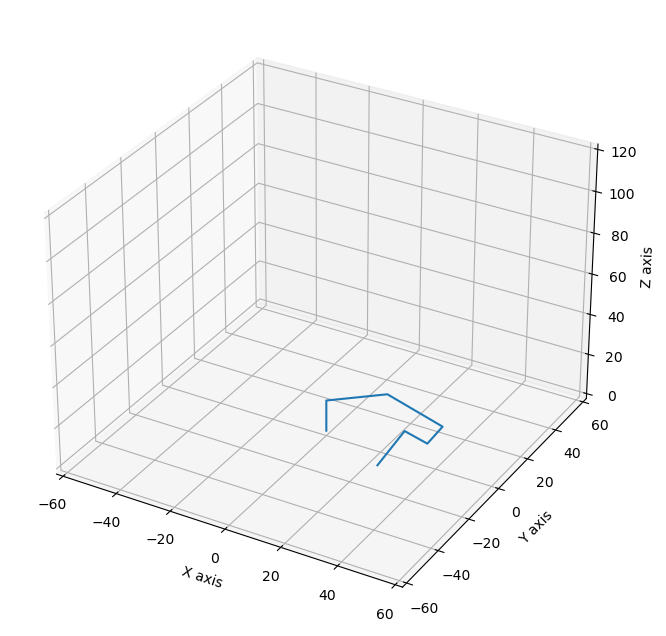

Text(0.5, 1.0, 'Error Trace')

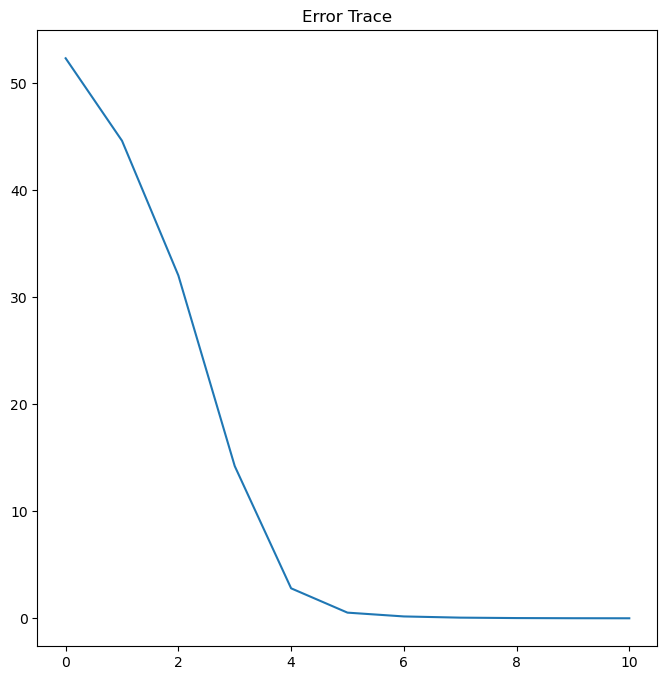

In [ ]:
joints = np.array([[0],[-np.pi/2],[0.0],[np.pi/2],[0.0],[0.0]])

target = np.array([[1, 0, 0, 30],
                   [0, 1, 0, -20],
                   [0, 0, -1, 10],
                   [0, 0, 0, 1]])

new_j, e_trace = i_kine(joints, target, error_trace=True, no_rotation=True)
print(new_j)
plot_pose(new_j)
plt.figure(figsize=(8,8))
plt.plot(e_trace)
plt.title('Error Trace')


Starting IK loop
Done in 56 iterations
Final position is: 
[ 29.44260003 -29.51352982  48.83378396]
Final rotation is: 
[[ 0.57469442 -0.64108283  0.50866405]
 [ 0.34087036  0.75259253  0.56339318]
 [-0.74399846 -0.15039042  0.65103687]]
[[ 1.96126361]
 [-1.05332357]
 [-0.00267224]
 [ 0.89734305]
 [ 1.25941149]
 [-0.80295688]]


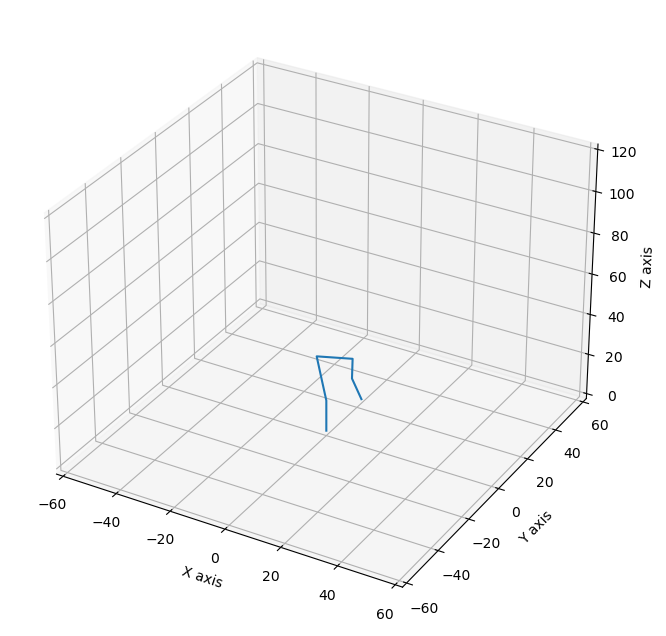

Text(0.5, 1.0, 'Error Trace')

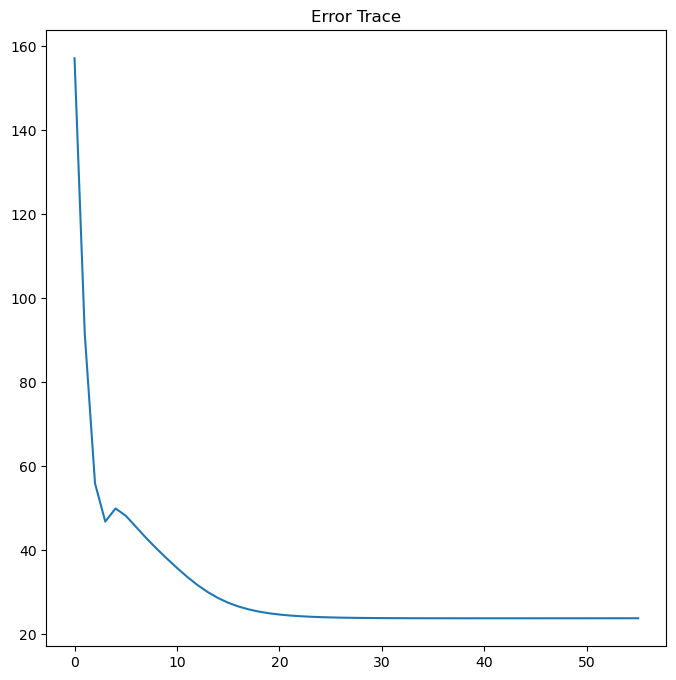

In [ ]:
joints = np.array([[np.pi/2],[-np.pi/2],[0.0],[np.pi/2],[0.0],[0.0]])

target =        np.array( [[ 0.35355339, -0.5732233 ,  0.73919892, 30       ],
                 [ 0.61237244,  0.73919892,  0.28033009, -30        ],
                [-0.70710678,  0.35355339 , 0.61237244, 50       ],
                [ 0.,          0. ,         0. ,         1.        ]])

new_j, e_trace = i_kine(joints, target, error_trace=True, no_rotation=False)
print(new_j)
plot_pose(new_j)
plt.figure(figsize=(8,8))
plt.plot(e_trace)
plt.title('Error Trace')
